<a href="https://colab.research.google.com/github/VISHWAJITT123/CVG-FILES/blob/master/cifar10_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Loading the dataset
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
#Get the shape of the data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
print(y_train.shape)

(50000, 1)


In [ ]:
print(y_train[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [ ]:
y_train = y_train.reshape(-1)
print(y_train[:5])

[6 9 9 4 1]


In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


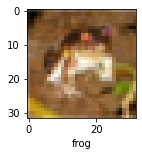

In [ ]:
plot_sample(x_train,y_train,0)

In [ ]:
model = Sequential()
#model.add(Conv2D(3000,kernel_size=3, activation='relu',input_shape=(32,32,3)))
#model.add(Conv2D(1500,kernel_size=3,activation='relu'))
#model.add(Conv2D(512,kernel_size=3, activation='relu'))
#model.add(Conv2D(256,kernel_size=3,activation='relu'))
#model.add(Conv2D(64,kernel_size=3,activation='relu'))
#model.add(Flatten())
#model.add(Dense(10, activation='softmax'))
#model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train_one_hot,validation_data=(x_test,y_test_one_hot),epochs= 50)

Epoch 1/50
1563/1563 [==============================] - 42s 6ms/step - loss: 10.7680 - accuracy: 0.3028 - val_loss: 1.4972 - val_accuracy: 0.4597
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4186 - accuracy: 0.4890 - val_loss: 1.2407 - val_accuracy: 0.5633
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2186 - accuracy: 0.5690 - val_loss: 1.1105 - val_accuracy: 0.6148
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0594 - accuracy: 0.6285 - val_loss: 1.0982 - val_accuracy: 0.6204
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9403 - accuracy: 0.6760 - val_loss: 1.0044 - val_accuracy: 0.6668
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8390 - accuracy: 0.7096 - val_loss: 0.9902 - val_accuracy: 0.6749
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7757 - accuracy: 0.7279 - val_loss: 0.8954 - val_accurac

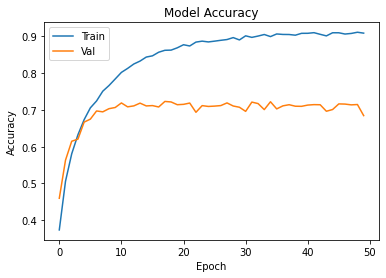

In [ ]:
#Visualize The model Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

In [ ]:
#Show probabilities for the first four images in the test set
predictions = model.predict(x_test[:4])
predictions

array([[3.19116552e-05, 1.05447953e-07, 1.14504147e-07, 7.84887910e-01,
        1.05524114e-05, 2.15049237e-01, 1.75774348e-05, 2.45762931e-06,
        1.11012994e-07, 5.80799266e-08],
       [9.08417511e-04, 9.80374515e-01, 2.93813605e-06, 2.08576353e-07,
        5.87834503e-11, 4.07314316e-09, 1.82606286e-07, 1.00279514e-07,
        5.97525714e-03, 1.27383815e-02],
       [1.54024381e-02, 6.81020832e-03, 9.32499068e-04, 2.50466546e-04,
        5.94628327e-05, 6.82100108e-06, 2.41626884e-04, 1.92080147e-03,
        6.85274541e-01, 2.89101183e-01],
       [9.66495097e-01, 7.06374180e-07, 1.19429035e-03, 3.54927374e-06,
        1.55423593e-04, 7.93098764e-07, 3.64134252e-07, 1.42875011e-03,
        3.07183713e-02, 2.59130366e-06]], dtype=float32)

In [ ]:
#Print our predictions as labels for our first four data
pred =np.argmax(predictions,axis = 1)
print(pred)
#Print the Actual labels

print(y_test[:4])

[3 1 8 0]
[[3]
 [8]
 [8]
 [0]]
